## Business Problem:

"A health and wellness company wants to develop a personalized obesity prevention program for individuals in Mexico, Peru, and Colombia. The company aims to predict obesity levels based on eating habits and physical conditions to tailor interventions effectively. Your task is to build a predictive model that accurately classifies individuals into different obesity levels, enabling the company to provide targeted recommendations and interventions."

## Import the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
df = pd.read_csv(R"C:\Users\Rohit\Downloads\ObesityDataSet_raw_and_data_sinthetic.csv")


## Display Records

In [2]:
print("First 5 records:")
print(df.head())

print("\nLast 5 records:")
print(df.tail())


First 5 records:
   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Trans

## Identify Data Types

In [3]:
print("\nData types:")
print(df.dtypes)


Data types:
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object


## Missing Entries

In [4]:
print("\nMissing entries per variable:")
print(df.isnull().sum())


Missing entries per variable:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


## Finding Duplicate Records

In [5]:
print("\nNumber of duplicate records:")
print(df.duplicated().sum())


Number of duplicate records:
24


## Univariate Analysis

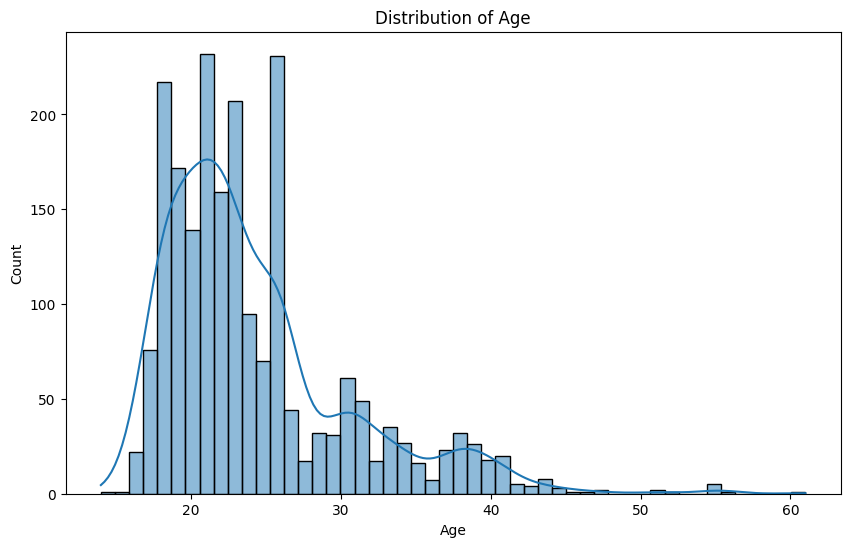

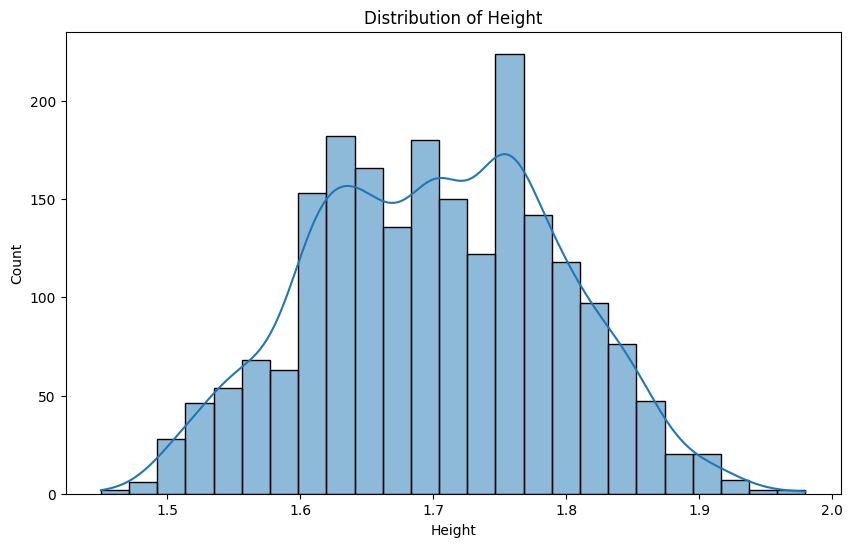

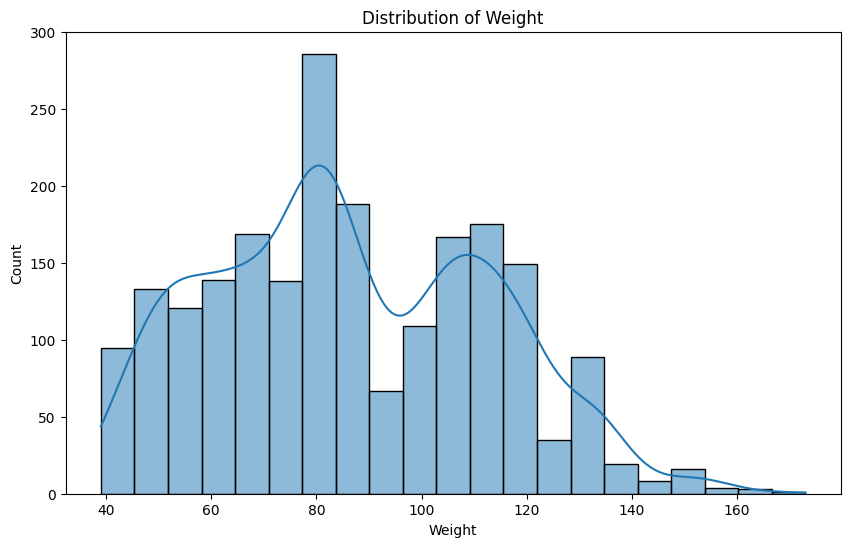

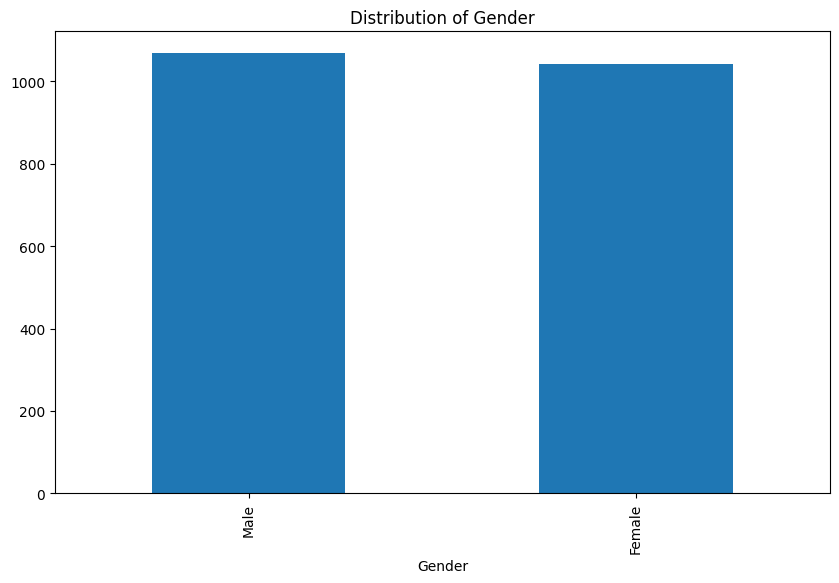

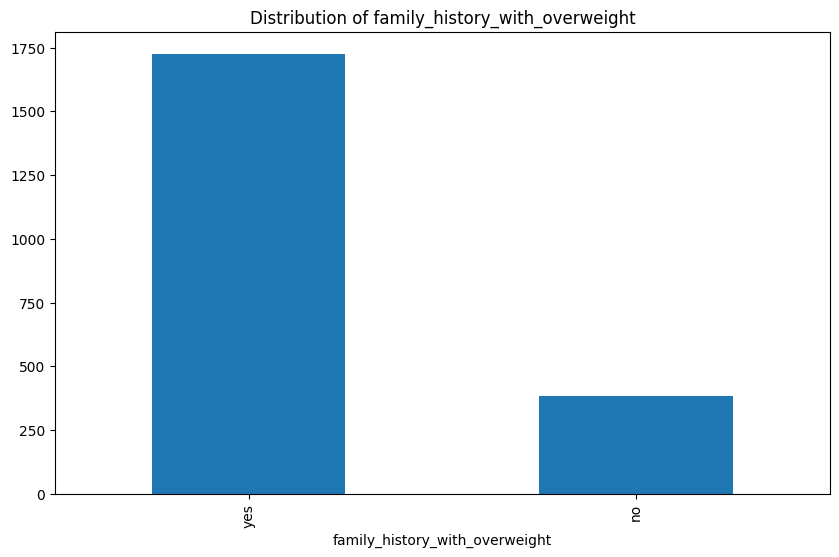

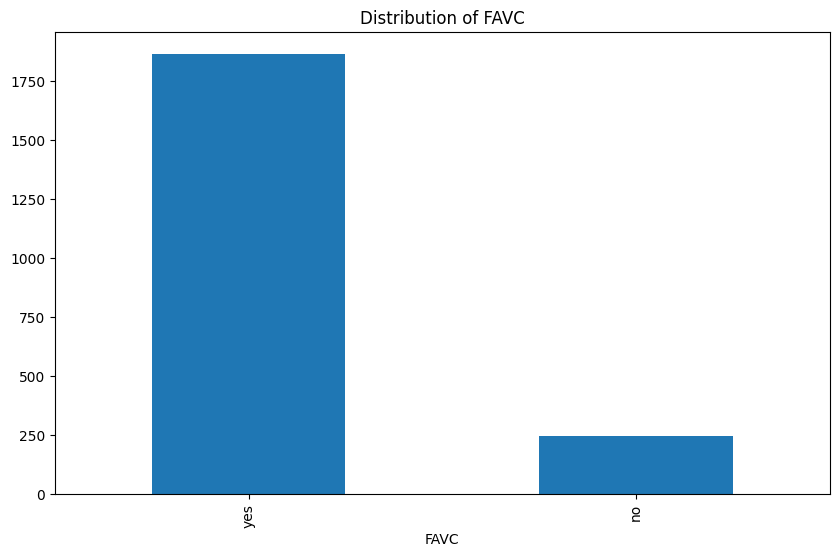

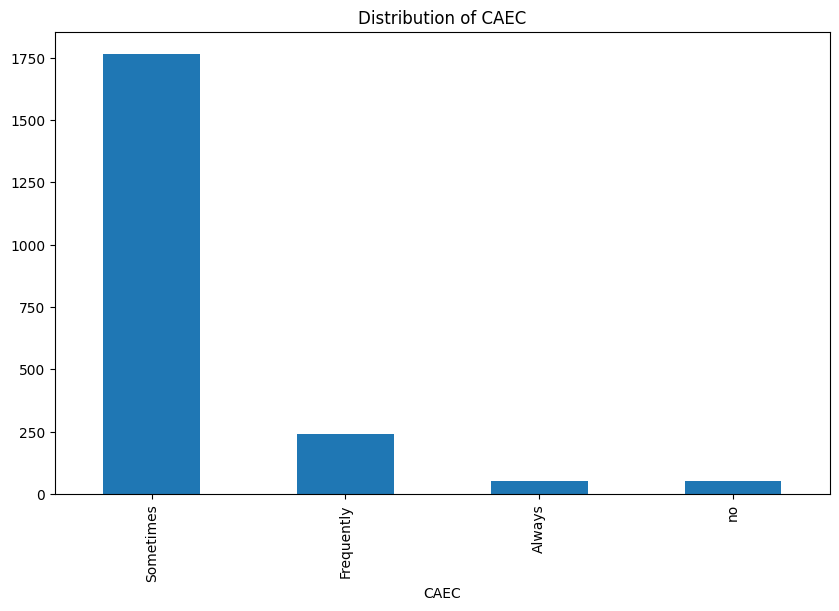

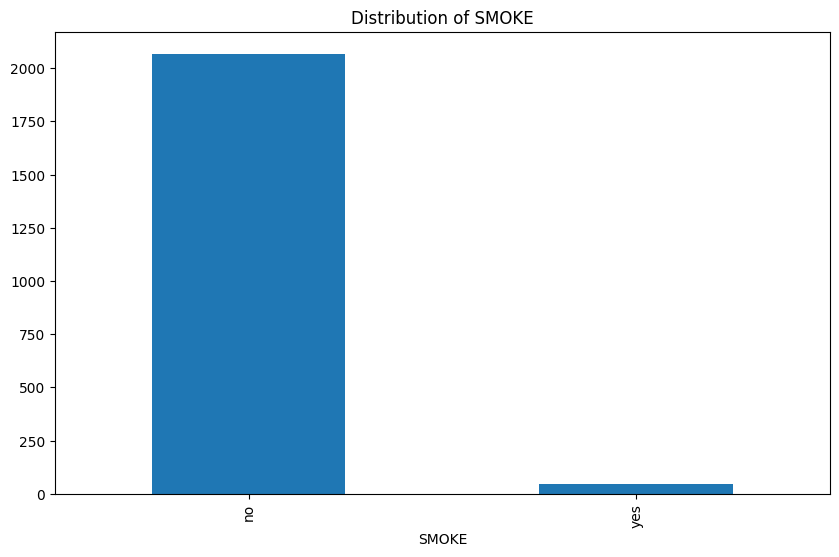

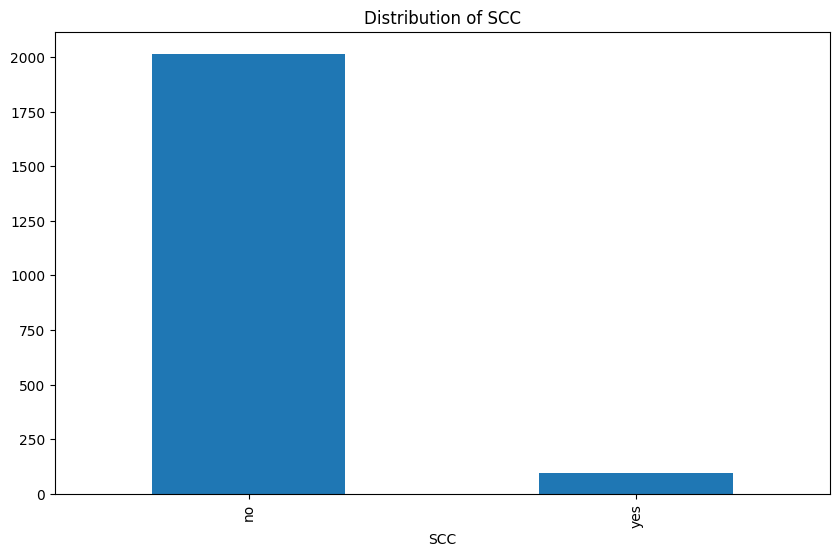

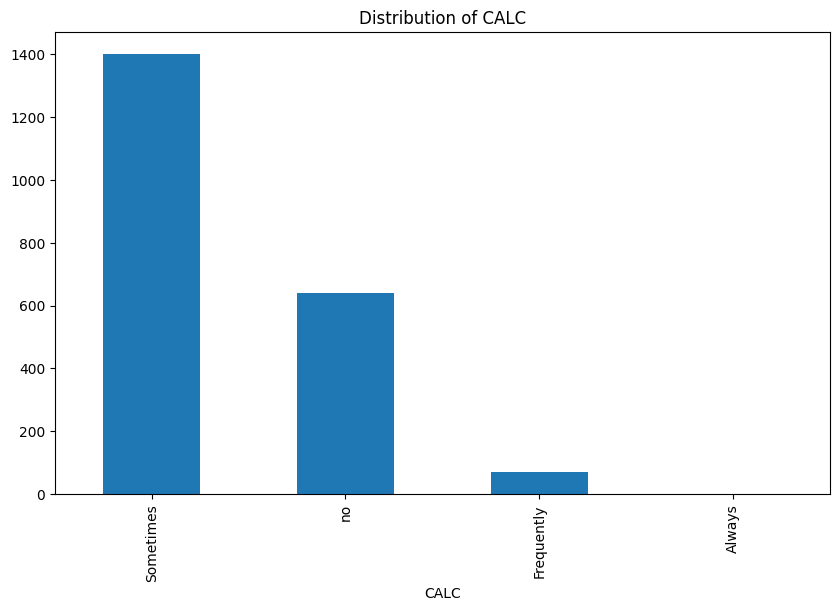

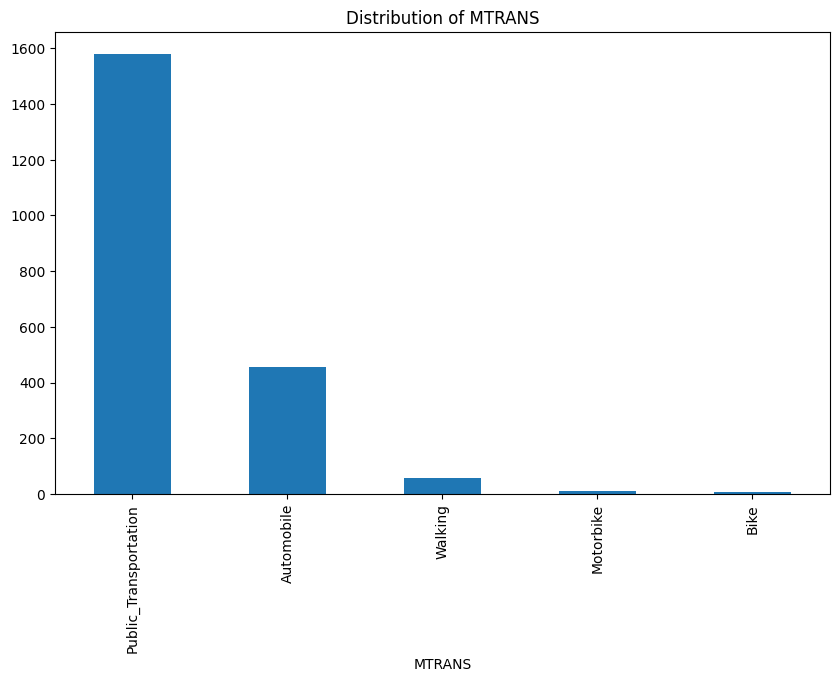

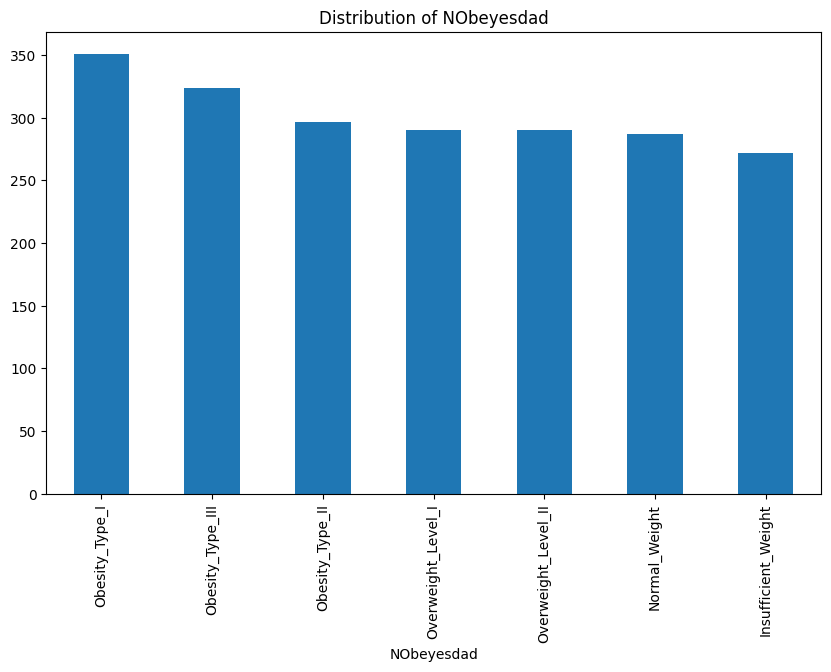

In [6]:
# Numerical variables
numerical_vars = ['Age', 'Height', 'Weight']
for var in numerical_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.show()

# Categorical variables
categorical_vars = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    df[var].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {var}')
    plt.show()

## Outlier Detection

In [18]:
X = df[numerical_vars]
lof = LocalOutlierFactor()
outlier_labels = lof.fit_predict(X)
outliers = X[outlier_labels == -1]
print(f"\nNumber of outliers detected: {len(outliers)}")

## WE used LOF to identify Outliers


Number of outliers detected: 100


## Bivariate Analysis


Chi-square test p-value: 8.088897293329991e-139


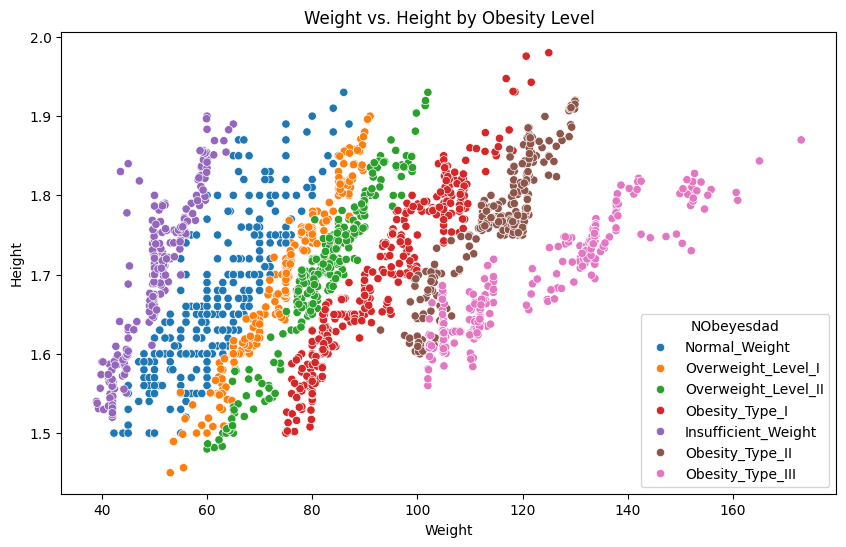

In [19]:
# Chi-square test
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['Gender'], df['NObeyesdad'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square test p-value: {p_value}")


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Weight', y='Height', hue='NObeyesdad')
plt.title('Weight vs. Height by Obesity Level')
plt.show()


## This scatter plot would show the relationship between weight and height, with different colors representing various obesity levels

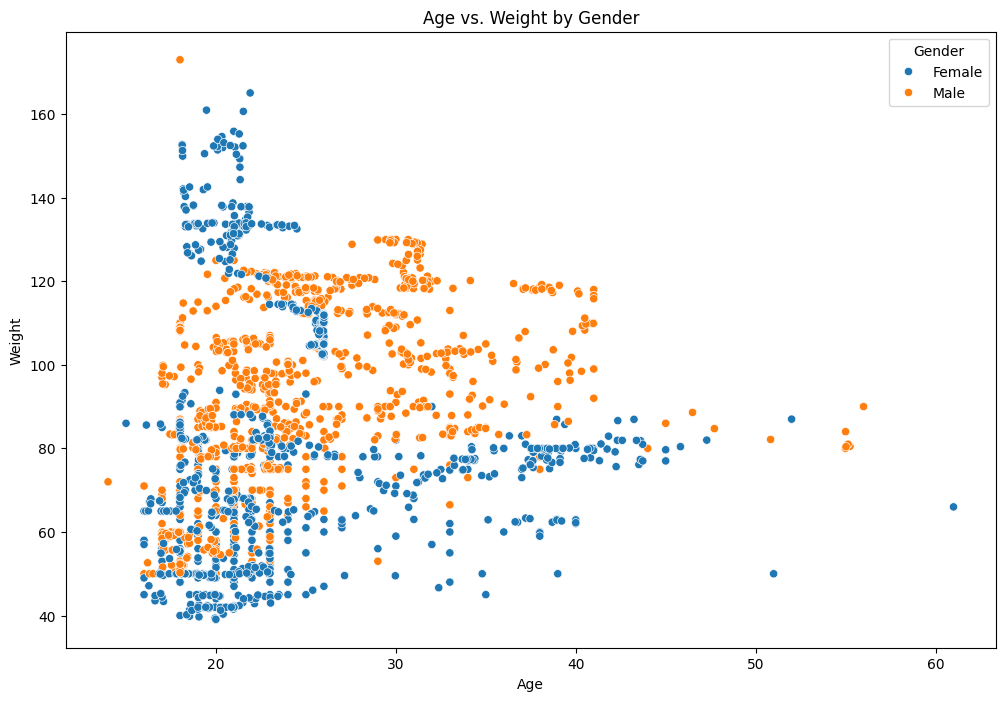

In [9]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Age', y='Weight', hue='Gender')
plt.title('Age vs. Weight by Gender')
plt.show()

## This plot would help us understand how age and weight are related, and if there are any gender-specific patterns

## Check for multicollinearity

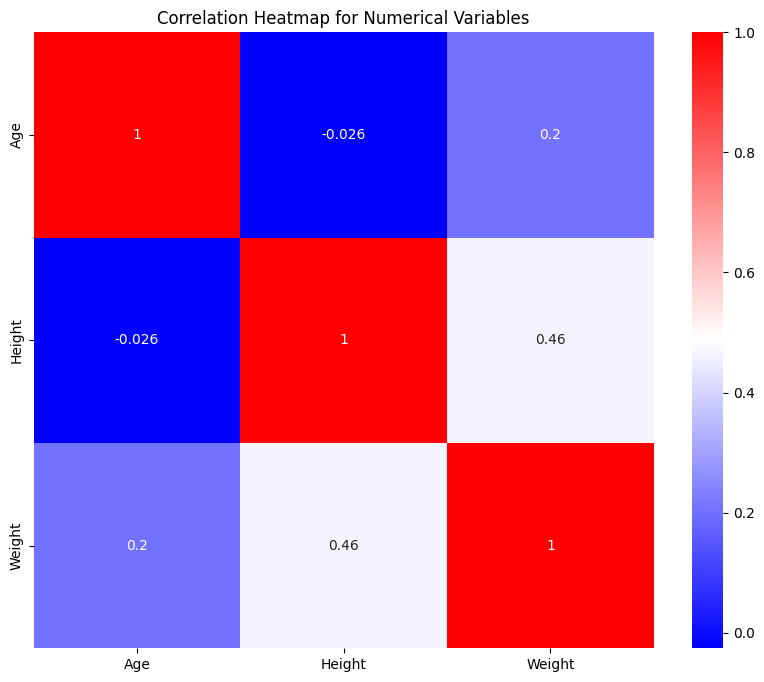


High correlations (>0.8):

Variance Inflation Factors:
  Variable        VIF
0      Age  15.236251
1   Height  24.090242
2   Weight  14.142185


In [10]:
# Correlation analysis for numerical variables
correlation_matrix = df[numerical_vars].corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='bwr')
plt.title('Correlation Heatmap for Numerical Variables')
plt.show()

# Identify high correlations
high_correlations = np.where(np.abs(correlation_matrix) > 0.8)
high_correlations = [(correlation_matrix.index[x], correlation_matrix.columns[y], correlation_matrix.iloc[x, y]) 
                     for x, y in zip(*high_correlations) if x != y and x < y]

print("\nHigh correlations (>0.8):")
for var1, var2, corr in high_correlations:
    print(f"{var1} - {var2}: {corr:.2f}")

# Check for multicollinearity using Variance Inflation Factor (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF for numerical variables
X_numerical = df[numerical_vars]
vif_results = calculate_vif(X_numerical)

print("\nVariance Inflation Factors:")
print(vif_results)


In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Make sure numerical_vars is defined
numerical_vars = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

def calculate_vif(X):
    vif = pd.DataFrame()
    vif["Variable"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF for numerical variables
X_numerical = df[numerical_vars]
vif_results = calculate_vif(X_numerical)
print("\nVariance Inflation Factors:")
print(vif_results)


Variance Inflation Factors:
  Variable        VIF
0      Age  17.058032
1   Height  69.285386
2   Weight  14.960538
3     FCVC  20.685569
4      NCP  13.819958
5     CH2O  12.764029
6      FAF   2.677405
7      TUE   2.389520


## Encode categorical variables

In [20]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

## Split the Dataset

In [21]:
X = df_encoded.drop('NObeyesdad', axis=1)
y = df_encoded['NObeyesdad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale the Dataset

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Perform PCA

In [26]:
pca = PCA()
pca.fit(X_train_scaled)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of principal components explaining 95% of variance: {n_components}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



Number of principal components explaining 95% of variance: 20


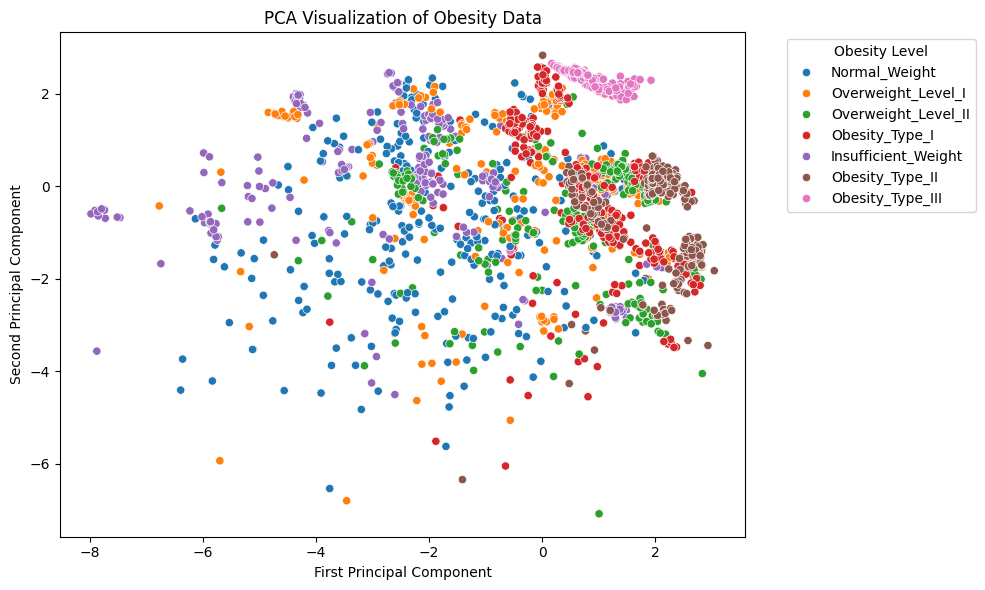

In [27]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1], hue=df['NObeyesdad'])
plt.title('PCA Visualization of Obesity Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.legend(title='Obesity Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Build Classification Model

In [28]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, lr_pred))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train_scaled, y_train)
rf_pred = rf_grid.predict(X_test_scaled)
print("\nRandom Forest Results:")
print(classification_report(y_test, rf_pred))

# SVM
svm_model = SVC(random_state=42)
svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear'],
    'gamma': ['scale', 'auto']
}
svm_grid = GridSearchCV(svm_model, svm_params, cv=5)
svm_grid.fit(X_train_scaled, y_train)
svm_pred = svm_grid.predict(X_test_scaled)
print("\nSVM Results:")
print(classification_report(y_test, svm_pred))

rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


Logistic Regression Results:
                     precision    recall  f1-score   support

Insufficient_Weight       0.86      1.00      0.93        56
      Normal_Weight       0.89      0.63      0.74        62
     Obesity_Type_I       0.93      0.88      0.91        78
    Obesity_Type_II       0.89      0.97      0.93        58
   Obesity_Type_III       1.00      1.00      1.00        63
 Overweight_Level_I       0.73      0.73      0.73        56
Overweight_Level_II       0.74      0.86      0.80        50

           accuracy                           0.87       423
          macro avg       0.86      0.87      0.86       423
       weighted avg       0.87      0.87      0.86       423


Random Forest Results:
                     precision    recall  f1-score   support

Insufficient_Weight       0.96      0.96      0.96        56
      Normal_Weight       0.83      0.92      0.87        62
     Obesity_Type_I       0.99      0.92      0.95        78
    Obesity_Type_II       0

## Check for overfitting

In [ ]:
print("\nTraining vs Testing Scores:")
print(f"Logistic Regression - Train: {lr_model.score(X_train_scaled, y_train):.4f}, Test: {lr_model.score(X_test_scaled, y_test):.4f}")
print(f"Random Forest - Train: {rf_grid.score(X_train_scaled, y_train):.4f}, Test: {rf_grid.score(X_test_scaled, y_test):.4f}")
print(f"SVM - Train: {svm_grid.score(X_train_scaled, y_train):.4f}, Test: {svm_grid.score(X_test_scaled, y_test):.4f}")

In [ ]:
from sklearn.model_selection import cross_val_score

# Cross-validation for Logistic Regression
lr_cv_scores = cross_val_score(lr_model, X_train_scaled, y_train, cv=5)
print(f"Logistic Regression CV scores: {lr_cv_scores}")
print(f"Logistic Regression CV mean score: {lr_cv_scores.mean()}")

# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_grid.best_estimator_, X_train_scaled, y_train, cv=5)
print(f"Random Forest CV scores: {rf_cv_scores}")
print(f"Random Forest CV mean score: {rf_cv_scores.mean()}")

# Cross-validation for SVM
svm_cv_scores = cross_val_score(svm_grid.best_estimator_, X_train_scaled, y_train, cv=5)
print(f"SVM CV scores: {svm_cv_scores}")
print(f"SVM CV mean score: {svm_cv_scores.mean()}")


In [ ]:
from sklearn.linear_model import LogisticRegressionCV

lr_model = LogisticRegressionCV(cv=5, random_state=42)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
print("\nLogistic Regression Results:")
print(classification_report(y_test, lr_pred))